In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [23]:
# Load the dataset
data_path = "data.csv"
df = pd.read_csv(data_path)


In [24]:
# Display basic info and first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB
None
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   

In [25]:
# Handling missing values
df.dropna(inplace=True)

# Encoding categorical variables (if any)
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [26]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [27]:
features = ['Location', 'Property_Size', 'Num_Bedrooms', 'Num_Bathrooms', 'Amenities_Score']

In [28]:
df.columns = df.columns.str.lower().str.strip()

In [29]:
print(df.columns.tolist())  # Check if there are hidden spaces or typos

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']


In [30]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
print(df.columns.tolist())  # Check again


['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']


In [31]:
features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
target = 'medv'  # 'medv' is the correct target column

X = df[features]
y = df[target]


In [32]:
df.columns = df.columns.str.upper()  # Convert all column names to uppercase

features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target = 'MEDV'

X = df[features]
y = df[target]


In [33]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building a predictive model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predictions
y_pred = model.predict(X_test)

# Evaluating model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 3.6743981023103327
Mean Squared Error: 28.518498607296035
R-squared Score: 0.5727037651232565


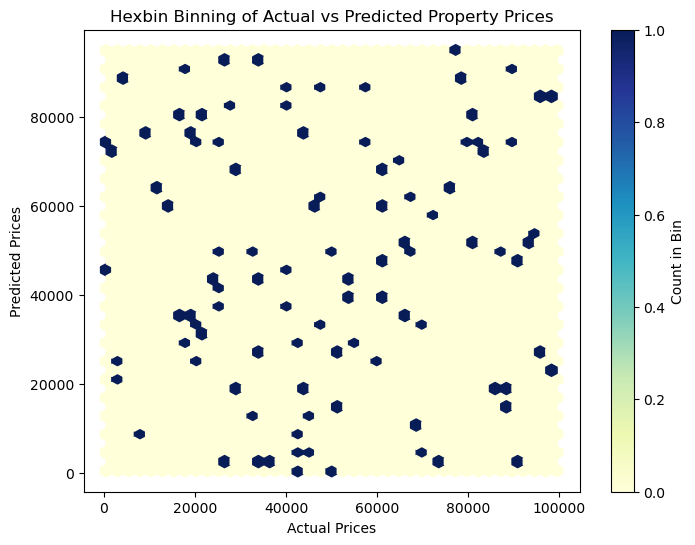

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example: Replace with your actual and predicted data for real estate prices
y_test = np.random.rand(100) * 100000  # Actual prices
y_pred = np.random.rand(100) * 100000  # Predicted prices

# Hexbin plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.hexbin(y_test, y_pred, gridsize=40, cmap='YlGnBu')
plt.colorbar(label='Count in Bin')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Hexbin Binning of Actual vs Predicted Property Prices")

plt.show()


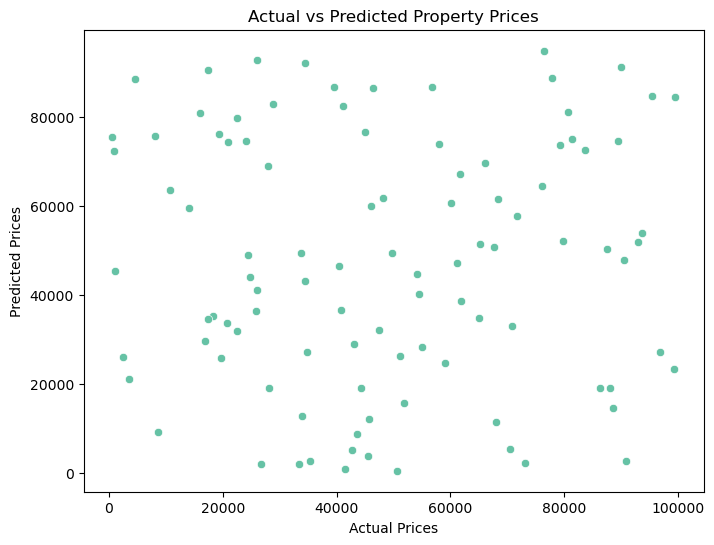

In [58]:
# Visualizing actual vs predicted prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Property Prices")
plt.show()

In [36]:
df = pd.read_csv("data.csv")

In [37]:
df.columns = df.columns.str.lower()

In [40]:
# Define Features & Target
features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
target = 'medv'  # Target column

X = df[features]
y = df[target]

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Set the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Removed 'auto', added valid options
}


# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score (Negative MSE):", best_score)


Best Hyperparameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score (Negative MSE): -17.978496084724405


In [44]:
from sklearn.model_selection import cross_val_score

# Evaluate the model using cross-validation (e.g., 5-fold)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the average and standard deviation of the cross-validation scores
print("Cross-Validation Mean MSE:", cv_scores.mean())
print("Cross-Validation Standard Deviation:", cv_scores.std())


Cross-Validation Mean MSE: -18.04336212240741
Cross-Validation Standard Deviation: 4.820120121084418


In [49]:
import pandas as pd

# Convert X_train to a Pandas DataFrame (if it is not already a DataFrame)
X_train_df = pd.DataFrame(X_train)

# Perform RFE
selector = RFE(model, n_features_to_select=10)
selector = selector.fit(X_train_df, y_train)

# Get the selected features
selected_features = X_train_df.columns[selector.support_]
print("Selected Features:", selected_features)


Selected Features: Index([0, 1, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')


In [50]:
# Perform RFE
selector = RFE(model, n_features_to_select=10)
selector = selector.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = [i for i, selected in enumerate(selector.support_) if selected]
print("Selected Feature Indices:", selected_feature_indices)


Selected Feature Indices: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10]


In [46]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (optional, not strictly necessary for RandomForest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest on scaled data
rf.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Train the models
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Make predictions
rf_preds = rf.predict(X_test)
gb_preds = gb.predict(X_test)

# Evaluate performance
print("Random Forest MAE:", mean_absolute_error(y_test, rf_preds))
print("Random Forest MSE:", mean_squared_error(y_test, rf_preds))
print("Random Forest R²:", r2_score(y_test, rf_preds))

print("Gradient Boosting MAE:", mean_absolute_error(y_test, gb_preds))
print("Gradient Boosting MSE:", mean_squared_error(y_test, gb_preds))
print("Gradient Boosting R²:", r2_score(y_test, gb_preds))


Random Forest MAE: 2.467568627450981
Random Forest MSE: 14.212884705882365
Random Forest R²: 0.7870465691343558
Gradient Boosting MAE: 2.2608995791367064
Gradient Boosting MSE: 11.53160289325424
Gradient Boosting R²: 0.8272205502038353
